# Titanic (Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv') #pandas에서 저장하는 파일 불러오기 함수
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


passengerId 의미 X, survived : target, Pclass : 퍼스트 클래스, 비즈니스 석 같은 것, Name : 이름, 사실 큰 의미 X, Sex : 성별, Age :나이, SibSp :  Sibling, Spouse, Parch : parent, child, Ticket : 티켓 번호, Fare : 요금, Cabin : 객실 번호, Embarked : 승선한 항구명

## Data Featuring

In [4]:
test_data.isnull().sum() # null값 개수 확인 test data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
train_data.isnull().sum() # null값 개수 확인 train data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data = [train_data, test_data]

성별 맵핑 문자열 바꿔주기

In [7]:
sex_index = {'male': 0, 'female': 1}

In [8]:
for dataset in data: # train data 와 test data 모두 바꿔주기
    dataset['Sex'] =dataset['Sex'].map(sex_index) 

Age null 값 대체

In [9]:
# train data set 
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()) #Age null 값 평균값으로 대체

# test data set
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [10]:
min(dataset['Age']),max(dataset['Age'])

(0.17, 76.0)

In [11]:
for dataset in data:
    dataset['Age'] = np.round(dataset['Age']/10) # data binning, 연속적인 데이터에 비해 불연속적인 데이터는 overfitting을 방지

In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,3.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,2.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,3.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,3.0,0,0,111369,30.0000,C148,C


embarked 정보에서 null 값 대체 및 mapping

In [13]:
embarked_index = {'S':0,'C':1,'Q':2}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map(embarked_index)

Fare 요금 정보 data binning

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

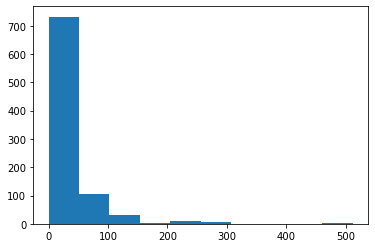

In [14]:
plt.hist(train_data['Fare'])

In [15]:
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean()) #null 값 평균값으로 대체
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [16]:
train_data['FareBin'] = pd.qcut(train_data['Fare'], 5) # 요금 정보를 다섯구간으로 나누어 cut
test_data['FareBin'] = pd.qcut(test_data['Fare'], 5)
for dataset in data:
    dataset['Fare_clean'] = dataset['FareBin'].astype('category').cat.codes # 구간에 해당하는 0~4를 mapping
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBin,Fare_clean
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0,"(-0.001, 7.854]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,4.0,1,0,PC 17599,71.2833,C85,1,"(39.688, 512.329]",4
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(7.854, 10.5]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,53.1000,C123,0,"(39.688, 512.329]",4
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,8.0500,NaN,0,"(7.854, 10.5]",1
5,6,0,3,"Moran, Mr. James",0,3.0,0,0,330877,8.4583,NaN,2,"(7.854, 10.5]",1
6,7,0,1,"McCarthy, Mr. Timothy J",0,5.0,0,0,17463,51.8625,E46,0,"(39.688, 512.329]",4
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,0,"(10.5, 21.679]",2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3.0,0,2,347742,11.1333,NaN,0,"(10.5, 21.679]",2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,30.0708,NaN,1,"(21.679, 39.688]",3


동승한 사람이 부모님인지, 배우자인지에 따라 생존여부가 달라지지 않을 것. 하지만 동승자 여부는 생존확률에 영향을 끼칠 수 있다. 따라서 동승자 수로 정보를 묶어줌.

In [17]:
train_data['FamilySize'] = (train_data['SibSp'] + train_data['Parch']) 
test_data['FamilySize'] = (test_data['SibSp'] + test_data['Parch'])

In [18]:
max(train_data['FamilySize']),max(test_data['FamilySize'])

(10, 10)

In [19]:
features_drop = ['Ticket', 'SibSp', 'Parch','Name','Cabin','FareBin','Fare'] #필요없는 정보나 처리해준 정보 drop

train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Fare_clean,FamilySize
0,1,0,3,0,2.0,0,0,1
1,2,1,1,1,4.0,1,4,1
2,3,1,3,1,3.0,0,1,0
3,4,1,1,1,4.0,0,4,1
4,5,0,3,0,4.0,0,1,0


In [21]:
from sklearn.ensemble import RandomForestClassifier #데이터를 중복을 허용하여 뽑은 뒤 small descion tree 진행
from sklearn.ensemble import VotingClassifier # model 중 다수결로 투표를 하여 예측한 결과를 종합.
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC 

In [22]:
RFC = RandomForestClassifier(n_estimators=100, max_depth=3, random_state = 0 )
LR = LogisticRegression(solver='lbfgs', random_state= 40)
SVM = SVC(gamma='scale', random_state= 40)
Perc = Perceptron(eta0=0.01, random_state=0)

model = VotingClassifier(
    estimators=[('lr', LR), ('rf',RFC), ('svc', SVM),('pnn',Perc)],
    voting = 'hard')

In [23]:
train = train_data.drop(['Survived','PassengerId'],axis = 1)
target = train_data['Survived']
test = test_data.drop('PassengerId',axis = 1)

In [24]:
model.fit(train, target)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=40)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=0)),
                             ('svc', SVC(random_state=40)),
                             ('pnn', Perceptron(eta0=0.01))])

In [25]:
prediction = model.predict(test)
accuracy = round(model.score(train, target) * 100, 2)
print("Accuracy : ", accuracy, "%")

Accuracy :  82.49 %


In [26]:
submission = pd.DataFrame(
    {
        "PassengerId":test_data["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
        "Survived":prediction
    }
)
submission.to_csv('submission.csv', index=False)

# Image Classification with CNN

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
import numpy as np

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

device

C:\Users\Administrator\anaconda3\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


'cpu'

In [29]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 데이터를 0~1사이의 값으로 정규화 시켜줌. 축의 중요도를 동일하게 함.

batch_size = 100

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2) #num_workers cpu에 코어에 작업 할당.

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



Files already downloaded and verified
Files already downloaded and verified


In [30]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, padding = 'same') #padding을 하여 convolution layer을 지난 후와 전이 scale이 같도록
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, padding = 'same')
        self.conv3 = nn.Conv2d(16, 32, 3, padding = 'same')
        self.conv4 = nn.Conv2d(32, 64, 3, padding = 'same')
        self.conv5 = nn.Conv2d(64, 128, 3, padding = 'same')
        self.fc1 = nn.Linear(128 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 64)
        self.fc3 = nn.Linear(64, 10)
        self.drop1 = nn.Dropout(0.25) 
        self.drop2 = nn.Dropout(0.4)

    def forward(self, x):
        x = F.relu(self.conv1(x))            # (32 32 6)
        x = self.pool(F.relu(self.conv2(x))) # (16 16 16)
        x = self.drop1(x)                    # 몇개의 kernal을 꺼줌 0.25의 확률로
        x = F.relu(self.conv3(x))            # (16 16 32)
        x = self.pool(F.relu(self.conv4(x))) # (8 8 64)
        x = self.drop1(x)                    
        x = self.pool(F.relu(self.conv5(x))) # (4 4 128)
        x = self.drop1(x)
        x = torch.flatten(x, 1)              # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = self.drop2(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)                      # cross entropy loss에 soft max 포함
        return x


net = Net()

In [31]:
import torch.optim as optim
model   = Net().to(device) # model을 gpu(가 있으면)에 할당
criterion = nn.CrossEntropyLoss().to(device) 
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader): # train_loader 에 배치마다 번호를 매겨 for loo를 돌림
        data, target = data.to(device), target.to(device)      
        optimizer.zero_grad()                                  # 미분값 초기화
        output = model(data)                                   # model에 fit
        loss = F.cross_entropy(output, target)                 # loss를 계산
        loss.backward()                                        # 역전파
        optimizer.step()                                       # parameter 업데이트

        if batch_idx % 240 == 0:                              # 0,24000, 48000 번째 배치마다 loss를 출력
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [33]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():                                     #미분값 계산X
        for data, target in test_loader:                      
            data, target = data.to(device), target.to(device)
            output = model(data)

            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [35]:
EPOCHS = 18
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.322813
Train Epoch: 1 [24000/50000 (48%)]	Loss: 1.644716
Train Epoch: 1 [48000/50000 (96%)]	Loss: 1.564294
[1] Test Loss: 1.4763, Accuracy: 45.69%
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.534243
Train Epoch: 2 [24000/50000 (48%)]	Loss: 1.248793
Train Epoch: 2 [48000/50000 (96%)]	Loss: 1.478456
[2] Test Loss: 1.2668, Accuracy: 53.97%
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.389102
Train Epoch: 3 [24000/50000 (48%)]	Loss: 1.223760
Train Epoch: 3 [48000/50000 (96%)]	Loss: 1.345448
[3] Test Loss: 1.1391, Accuracy: 59.83%
Train Epoch: 4 [0/50000 (0%)]	Loss: 1.258472
Train Epoch: 4 [24000/50000 (48%)]	Loss: 0.993654
Train Epoch: 4 [48000/50000 (96%)]	Loss: 1.169895
[4] Test Loss: 1.0741, Accuracy: 61.40%
Train Epoch: 5 [0/50000 (0%)]	Loss: 1.065121
Train Epoch: 5 [24000/50000 (48%)]	Loss: 1.053432
Train Epoch: 5 [48000/50000 (96%)]	Loss: 1.139730
[5] Test Loss: 0.9793, Accuracy: 65.71%
Train Epoch: 6 [0/50000 (0%)]	Loss: 1.104008
Train Epoch: 6 [24000/50000 (4

CNN엔 다양한 model들이 있습니다. Deep,CNN,VGGNet, GoogleNet, MobileNet, effiNet 등 최신 모델은 영상 분류의 목적을 두고 많은 convolution 
Layer를 쌓았지만, 최적화되었다고 하더라도, 시간도 오래걸리고 이해하기 힘든 복잡한 model을 쓰는 것보다는 간단한 model로 이미지를 분류해
보자라는 생각에 비교적 간단한 VGGNet을 바탕으로 model을 작성했습니다. VGGNet은 16과 19 두가지가 있는데, convolution layer의 갯수에 따라 달라집니다. 하지만 cifar 10의 데이터는 해상도가 낮은 데이터이기 때문에 그렇게 많은 layer가 필요없다고 판단하였습니다. 그리고 전 모델과 비교하면 전 모델은 kernel size를 크게 하였다가 줄여나가면서 하지 않고 작은 단위의 kernel인 3X3 kernel을 사용하는 것과 Padding을 이용하여 data size가 일정하게 유지되도록 하는 것이 차이점인데 이를 이용하여 모델을 구상하였습니다. 처음에는 convolution Layer와 maxpool, fully connected layer로 구성된 CNN을 이용해 학습시켰는데, 정확도가 높지 않아, convolution layer를 추가하였고 이 경우에 parameter들이 많다보니 2번의 epoch에도 overfitting 되어 convolution layer와 fully connected layer에 dropout을 (뒤의 layer에 확률을 높여가며) 적용하여 overfitting을 줄였습니다. 그 결과 18번째에 정확도 77%정도에 overfitting이 일어나도록 늦출 수 있었습니다. 또, layer가 쌓일 수록 분산이 변화하는 것을 방지하는 batchnormalization을 추가해보았는데, 전과 후의 변화가 크지 않다보니 제외하고 완성했습니다. 결론적으로 5개의 convolution layer와 3번의 maxpool 그리고 fully connected layer 로 구성하였고, optimizer, criterion, activation 함수로는 각각 adam, cross entropy, ReLU를 사용하였습니다. 정확도를 높이기 위해 더 해볼 수 있는 것은 더 다양한 model을 바꿔 진행해보는 것과 upsampling을 하여 fully connected에 들어가는 data의 size를 크게 해보는 것, layer를 더 쌓고 batchnormalization을 해보는 것, 이미지 전처리를 해보는 것 등이 있을 것 같습니다. 
두개의 convolution layer을 쌓았을 때, 50%대 였던 정확도에 비해 70%정도면 만족스러운 결과라고 생각하고, pytorch tutorial에서 제공하는 결과를 보면 (https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html) category 별로 CNN이 구별하기 힘든 데이터가 있기 때문에 위 코드처럼 간단한 CNN 구조로는 더 높은 정확도는 나오기 힘들다고 생각됩니다. 
